<a href="https://colab.research.google.com/github/someshsingh22/News-Propaganda-Detection/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary libraries
from google.colab import drive
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
directory='/content/gdrive/My Drive/News-Propaganda-Detection/datasets/train-labels-task2-technique-classification'
List=[]
for file in tqdm_notebook(os.listdir(directory)):
  List.append(open('{}/{}'.format(directory,file)).read().split('\n'))


In [0]:
Flat_type=[]
Flat_len=[]
for doc in List :
    for line in doc :
        split=line.split('\t')
        if not split[1:] == []:
            Flat_type.append(split[1])
            Flat_len.append(int(split[3])-int(split[2]))

In [6]:
df=pd.DataFrame({'Type' : Flat_type, 'Length' : Flat_len})
df.describe()

,Length
count,6369.000000
mean,48.630397
std,62.523064
min,3.000000
25%,14.000000
50%,25.000000
75%,54.000000
max,799.000000


In [7]:
df.groupby(['Type']).describe()

Length              ...               
                                     count        mean  ...     75%    max
Type                                                    ...               
Appeal_to_Authority                  155.0  134.864516  ...  176.50  712.0
Appeal_to_fear-prejudice             321.0   97.523364  ...  139.00  444.0
Bandwagon,Reductio_ad_hitlerum        77.0   98.038961  ...  129.00  360.0
Black-and-White_Fallacy              112.0  105.401786  ...  133.00  344.0
Causal_Oversimplification            212.0  124.160377  ...  156.25  438.0
Doubt                                496.0  124.931452  ...  175.00  799.0
Exaggeration,Minimisation            493.0   45.125761  ...   58.00  231.0
Flag-Waving                          250.0   63.144000  ...   86.00  400.0
Loaded_Language                     2200.0   24.807727  ...   29.00  541.0
Name_Calling,Labeling               1105.0   26.637104  ...   33.00  192.0
Repetition                           621.0   17.985507  ...   18.00  190.0
Slogans                              138.0   25.579710  ...   30.00   73.0
Thought-terminating_Cliches           80.0   31.187500  ...   36.25  105.0
Whataboutism,Straw_Men,Red_Herring   109.0   97.596330  ...  135.00  390.0

[14 rows x 8 columns]

In [0]:
span_len=dict()
for span in set(df['Type']) :
    span_len[span]=df[df['Type']==span]['Length']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

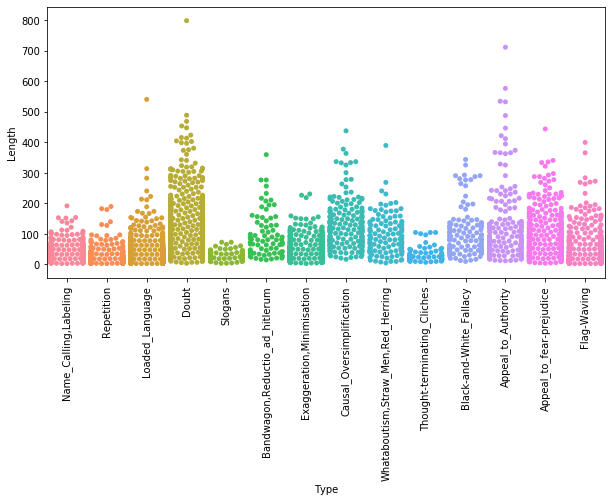

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.swarmplot(x='Type', y='Length', data=df)
plt.xticks(rotation=90)